In [ ]:
# 1. Возьмите датасет Mortality and Water Hardness
# https://www.kaggle.com/ukveteran/mortality-and-water-hardness

# Дополнительно будет выложен в ЛК
# В этом датасете содержатся данные по средней годовой смертности на
# 100000 населения и концентрации кальция в питьевой воде для 61
# большого города в Англии и Уэльсе. Города дополнительно поделены на
# северные и южные.

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
hardwater = pd.read_csv('water.csv')
hardwater.head(100)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


In [8]:
hardwater.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [ ]:
# 2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

# Построить точечный график
# Рассчитать коэффициенты корреляции Пирсона и Спирмена
# Построить модель линейной регрессии
# Рассчитать коэффициент детерминации
# Вывести график остатков

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

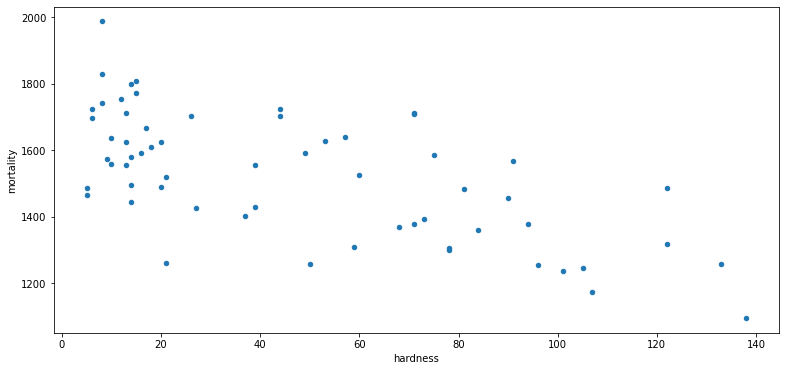

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6
hardwater.plot(kind='scatter', x='hardness', y='mortality')


Имеем обратную связь между жесткостью воды и смертностью

In [13]:
#Корреляция Пирсона
hardwater[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


Корреляция явная, так как превышает 0,5 и равна 0,65

In [14]:
#Корреляция Спирмена 
hardwater[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [15]:
# Корреляция Кенделла
hardwater[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [17]:
# Импортируем библиотеки

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
# Определяем столбцы со значениями х и у
X = hardwater[['hardness']]
Y = hardwater['mortality']

In [44]:
# Определяем параметры модели, пропорции данных для обучения и теста
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
   
x_train.shape


(42, 1)

In [26]:
y_train.shape

(42,)

In [20]:
# модель обучается на данных и подбирает оптимальные коэффициенты
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
model.coef_

array([-3.13167087])

In [22]:
model.intercept_

1668.9722977277095

In [28]:
y_pred = model.predict(x_test)
y_pred


array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [29]:
#Коэффициент детерминации
model.score(x_test, y_test)

0.5046490611017092

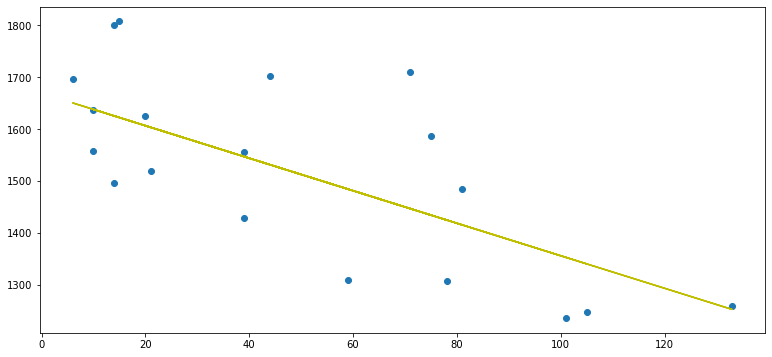

In [30]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='y')

C:\Users\DDD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

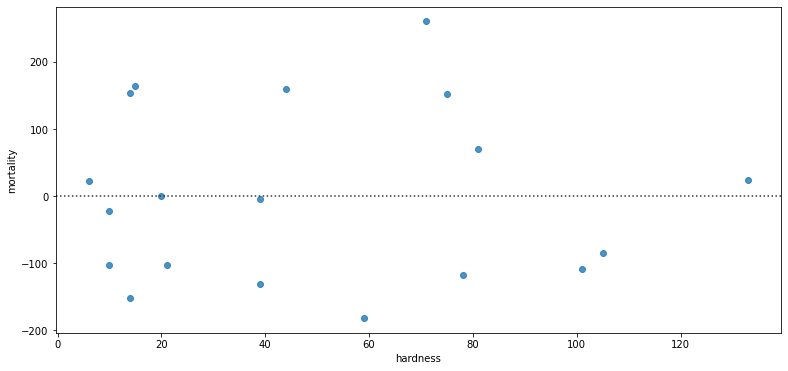

In [31]:
#График остатков

sns.residplot(x_test, y_test, data=hardwater) 

In [ ]:
# 3 Задание.
# Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

# Разделить данные на 2 группы
# Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [32]:
south = hardwater[hardwater.location == 'South']
south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [33]:
north = hardwater[hardwater.location == 'North']
north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

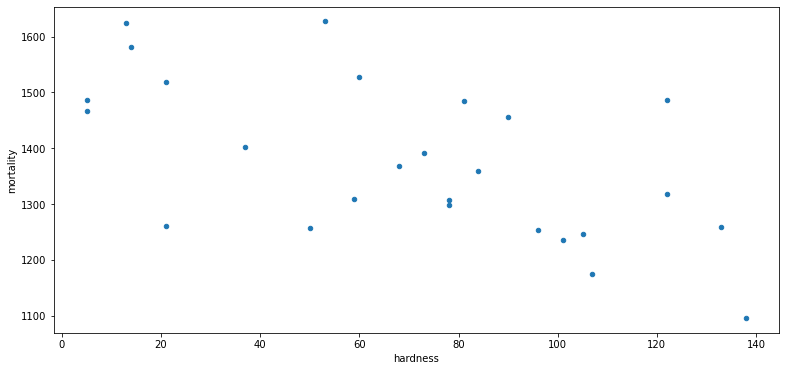

In [34]:
south.plot(kind='scatter', x='hardness', y='mortality')

Прослеживается обратная линейная зависимость

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

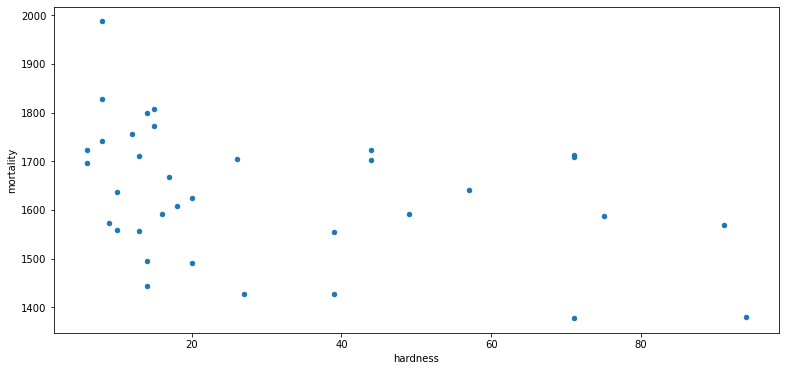

In [35]:
north.plot(kind='scatter', x='hardness', y='mortality')

Прослеживается обратная легкая динейная зависимость

In [36]:
#Корреляция Пирсона на юге

south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [38]:
#Корреляция Пирсона на севере 
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [39]:
#Корреляция Спирмена на юге
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [40]:
#Корреляция Спирмена на севере 
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [41]:
# Корреляция Кенделла на юге
south[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


In [42]:
# Корреляция Кенделла на севере 
north[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


In [130]:
# Построение модели Юг

# Определяем столбцы со значениями х и у
XS = south[['hardness']]
YS = south['mortality']

In [131]:
# Определяем параметры модели, пропорции данных для обучения и теста
x_train, x_test, y_train, y_test = train_test_split(XS, YS, test_size=0.30, random_state=42)
   
x_train.shape

(18, 1)

In [132]:
y_train.shape

(18,)

In [133]:
# модель обучается на данных и подбирает оптимальные коэффициенты
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [134]:
model.coef_

array([-3.51342921])

In [135]:
model.intercept_

1640.2204603423374

In [136]:
yS_pred = model.predict(x_test)
yS_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [137]:
#Коэффициент детерминации на юге
model.score(x_test, y_test)

-2.5519223012352077

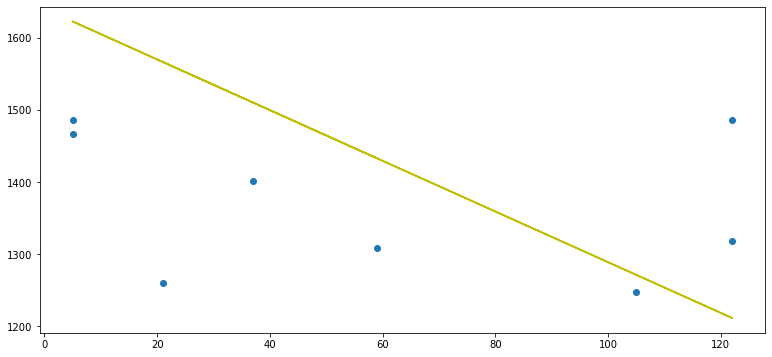

In [138]:
plt.scatter(x_test, y_test)
plt.plot(x_test, yS_pred, c='y')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

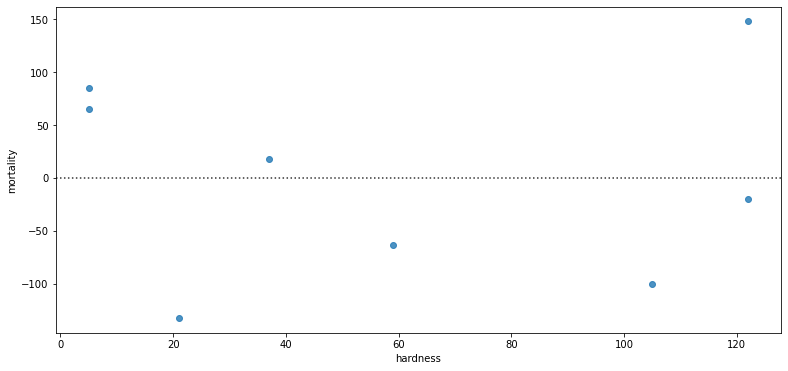

In [141]:
#График остатков на юге

sns.residplot(x_test, y_test, data=south) 

In [143]:
# Построение модели Север

# Определяем столбцы со значениями х и у
XN = north[['hardness']]
YN = north['mortality']

In [144]:
# Определяем параметры модели, пропорции данных для обучения и теста
x_train, x_test, y_train, y_test = train_test_split(XN, YN, test_size=0.30, random_state=42)
   
x_train.shape

(24, 1)

In [145]:
y_train.shape

(24,)

In [146]:
# модель обучается на данных и подбирает оптимальные коэффициенты
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [147]:
model.coef_

array([-1.97686226])

In [148]:
model.intercept_

1688.150229031281

In [149]:
yN_pred = model.predict(x_test)
yN_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [150]:
#Коэффициент детерминации на севере
model.score(x_test, y_test)

0.018885304285745863

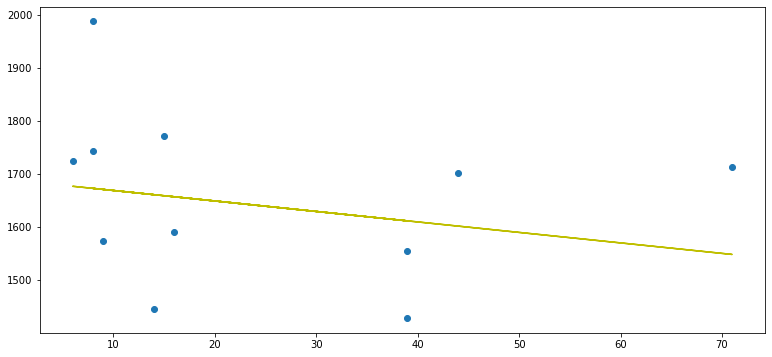

In [151]:
plt.scatter(x_test, y_test)
plt.plot(x_test, yN_pred, c='y')

C:\Users\DDD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

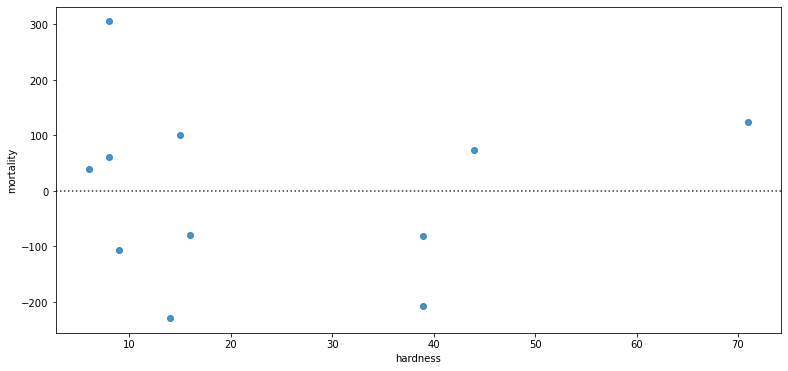

In [152]:
#График остатков на юге

sns.residplot(x_test, y_test, data=north) 